In [1]:
%%capture # hide the output
! pip install plotly
! pip install networkx
! pip install python-louvain

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 노드 리스트, 엣지 리스트 정의
node_list = [1, 2, 3, 4, 5]
edge_list = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), 
             (2, 1), (2, 3), (2, 5),
             (3, 1), (3, 2),  
             (4, 1),
             (5, 1),(5, 2)
               ]

# 그래프 생성 (networkx 라이브러리 사용)
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# 인접행렬 생성
'''
adjency_matrix의 경우 sparese matrix로 생성되기 때문에
todense()를 통해 dense matrix로 변환해준다.

sparese matrix는 0이 아닌 요소들 그 인덱스만을 저장하는 방식
dense matrix는 0을 포함하여 모든 요소를 저장하는 방식
'''
adj_matrix = nx.adjacency_matrix(G).todense() 
print('Adjacency Matrix')
print(adj_matrix)


Adjacency Matrix
[[1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]]


In [3]:
adj_matrix_sparse = nx.adjacency_matrix(G)
print('Adjacency Matrix (sparse)')
print(adj_matrix_sparse)

Adjacency Matrix (sparse)
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (4, 0)	1
  (4, 1)	1


In [4]:
# 라벨 지정
custom_labels = {1: "Seoul", 2: "Daejeon", 3: "Daegu", 4: "Busan", 5: "Gwangju"}

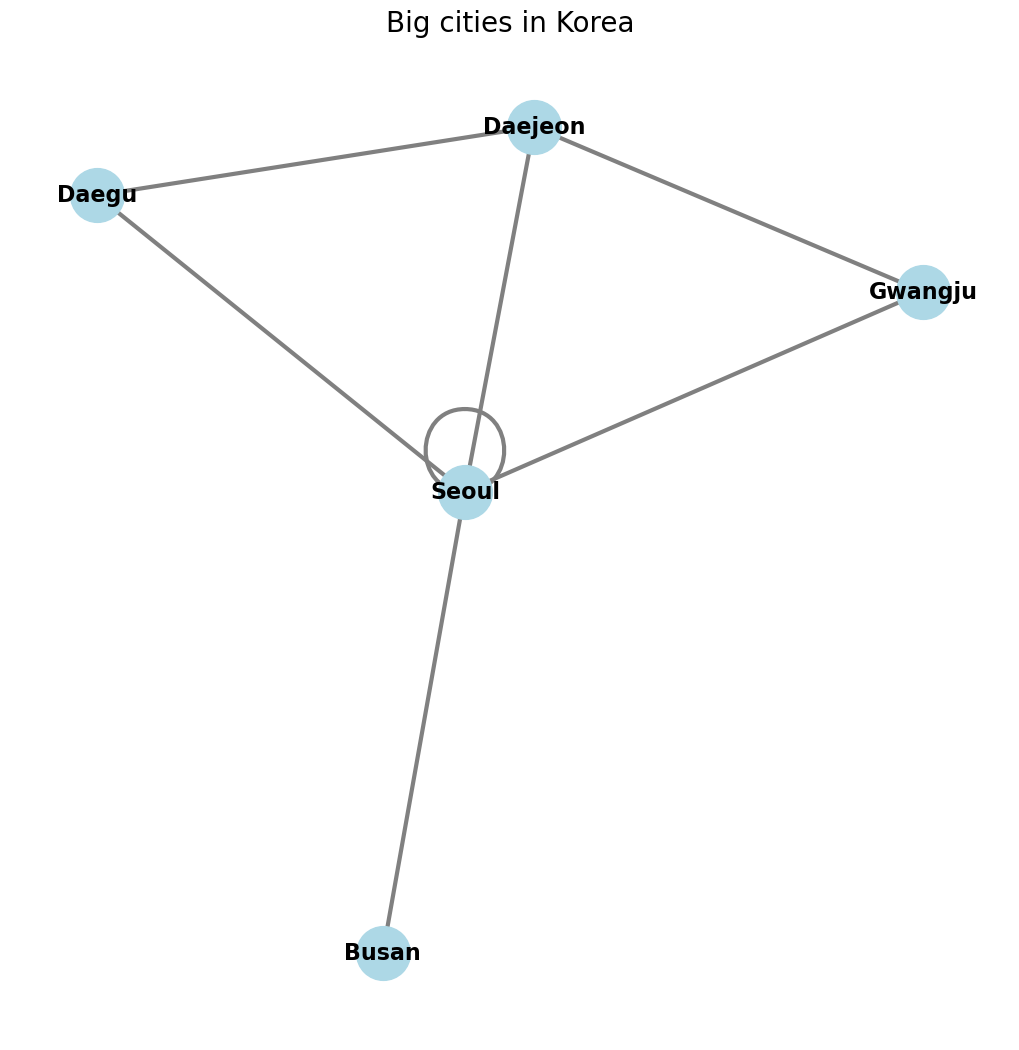

In [5]:
# 그래프 시각화
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, labels=custom_labels, node_color='lightblue', node_size=1500, font_size=16, font_color='black', font_weight='bold', width=3, edge_color='gray')
plt.title('Big cities in Korea', fontsize=20)
plt.show()

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 카라테 클럽 데이터셋 로드
G = nx.karate_club_graph()

In [7]:
# 그래프 내 노드/엣지 수 출력하기
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 34
Number of edges: 78


In [8]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [9]:
# id 100을 갖는 새로운 노드 추가
G.add_node(100)

In [10]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 100))

In [11]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [12]:
# Connect the new node to all existing nodes
# 전체 노드에 다 연결해주기
for node in G.nodes:
    if node != 100:
        G.add_edge(100, node, weight=1)

In [13]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (0, 100), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (1, 100), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (2, 100), (3, 7), (3, 12), (3, 13), (3, 100), (4, 6), (4, 10), (4, 100), (5, 6), (5, 10), (5, 16), (5, 100), (6, 16), (6, 100), (7, 100), (8, 30), (8, 32), (8, 33), (8, 100), (9, 33), (9, 100), (10, 100), (11, 100), (12, 100), (13, 33), (13, 100), (14, 32), (14, 33), (14, 100), (15, 32), (15, 33), (15, 100), (16, 100), (17, 100), (18, 32), (18, 33), (18, 100), (19, 33), (19, 100), (20, 32), (20, 33), (20, 100), (21, 100), (22, 32), (22, 33), (22, 100), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (23, 100), (24, 25), (24, 27), (24, 31), (24, 100), (25, 31), (25, 100), (26, 29), (26, 33), (26, 100), (27, 33), (27, 100), (28, 31), (28, 33), (28, 100), (29, 32), (29, 33), (29, 100), (30

In [14]:
# 노드 제거 -> 인접한 엣지도 모두 제거함
G.remove_node(100) # automatically remove the all edges connected to the node

In [15]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

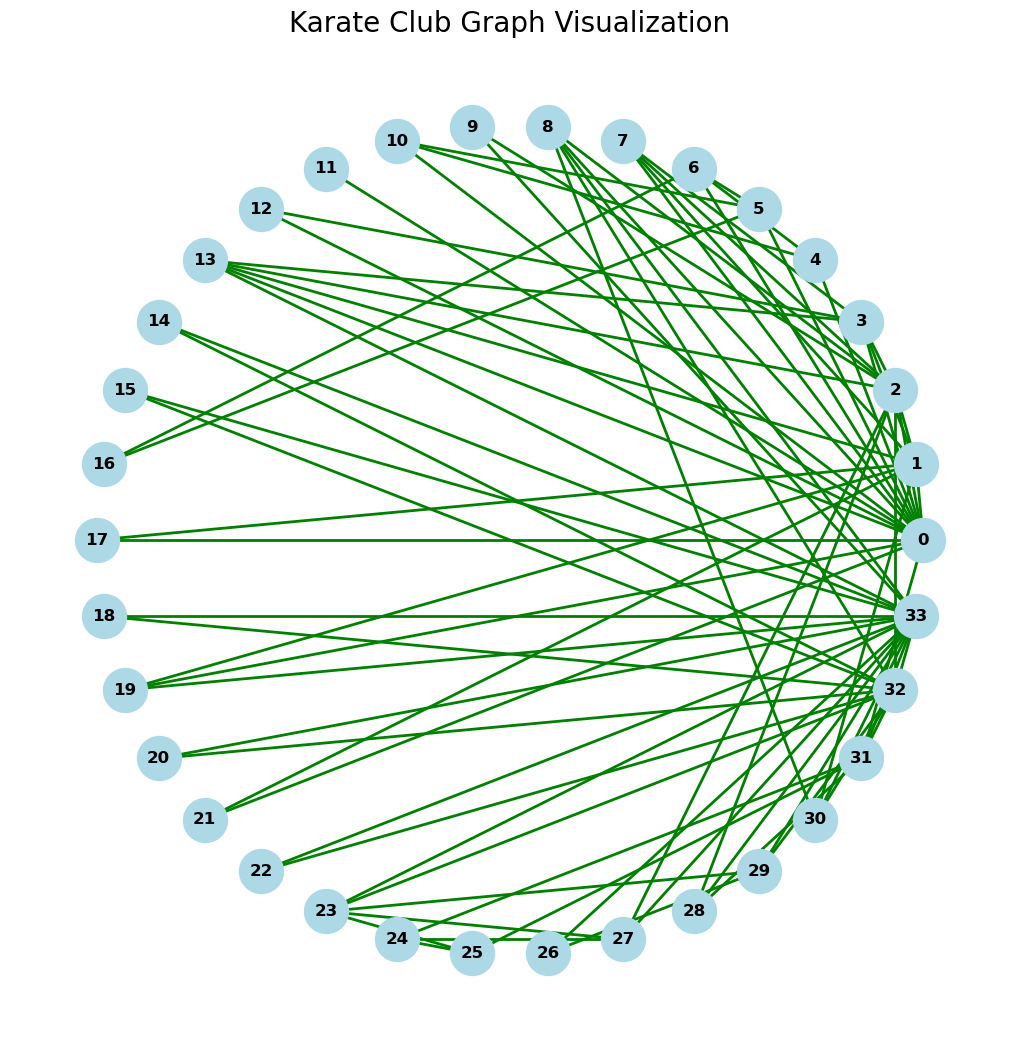

In [17]:
# 원형으로 시각화
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12, font_weight='bold', node_color='lightblue', edge_color='green', width=2)
plt.title('Karate Club Graph Visualization', fontsize=20)
plt.show()

In [18]:
# degree: 노드의 차수(연결된 엣지의 수)
# 각 노드의 차수
degree_sequence = [d for n, d in G.degree()]
print(f'Degree sequence: {degree_sequence}')

Degree sequence: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


In [19]:
[(n, d) for n, d in G.degree()]

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 5),
 (24, 3),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 3),
 (29, 4),
 (30, 4),
 (31, 6),
 (32, 12),
 (33, 17)]

In [20]:
# 그래프 내 평균 차수
average_degree = np.mean(degree_sequence)
print(f'Average degree: {average_degree}')

Average degree: 4.588235294117647


In [21]:
# 최대/최소 차수
max_degree = np.max(degree_sequence)
min_degree = np.min(degree_sequence)
print(f'Maximum degree: {max_degree}')
print(f'Minimum degree: {min_degree}')

Maximum degree: 17
Minimum degree: 1


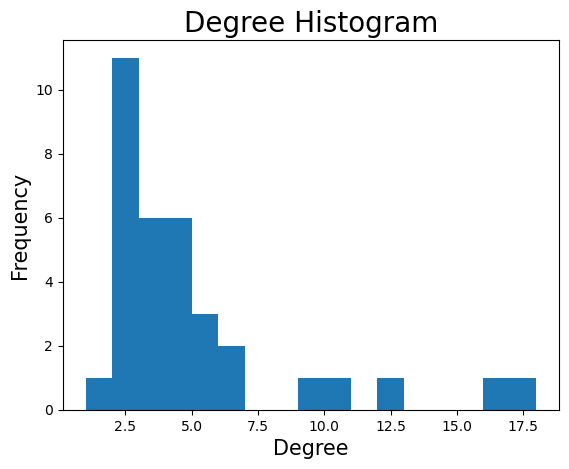

In [22]:
# 차수 분포
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+2))
plt.title('Degree Histogram', fontsize=20)
plt.xlabel('Degree', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [23]:
# 그래프의 밀도는?
density = nx.density(G)
print(f'Graph density: {density}')

Graph density: 0.13903743315508021


In [24]:
# 임의의 두 노드에 대해 최단 경로 계산
path_length = nx.shortest_path_length(G, source=1, target=22)
print(f'Shortest path length between node 1 and 22: {path_length}')

Shortest path length between node 1 and 22: 3


In [25]:
# 인접행렬 생성
A = nx.adjacency_matrix(G)
print('Adjacency Matrix')
print(A.todense())

Adjacency Matrix
[[0 4 5 ... 2 0 0]
 [4 0 6 ... 0 0 0]
 [5 6 0 ... 0 2 0]
 ...
 [2 0 0 ... 0 4 4]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 4 5 0]]


# interactive한 그래프 시각화

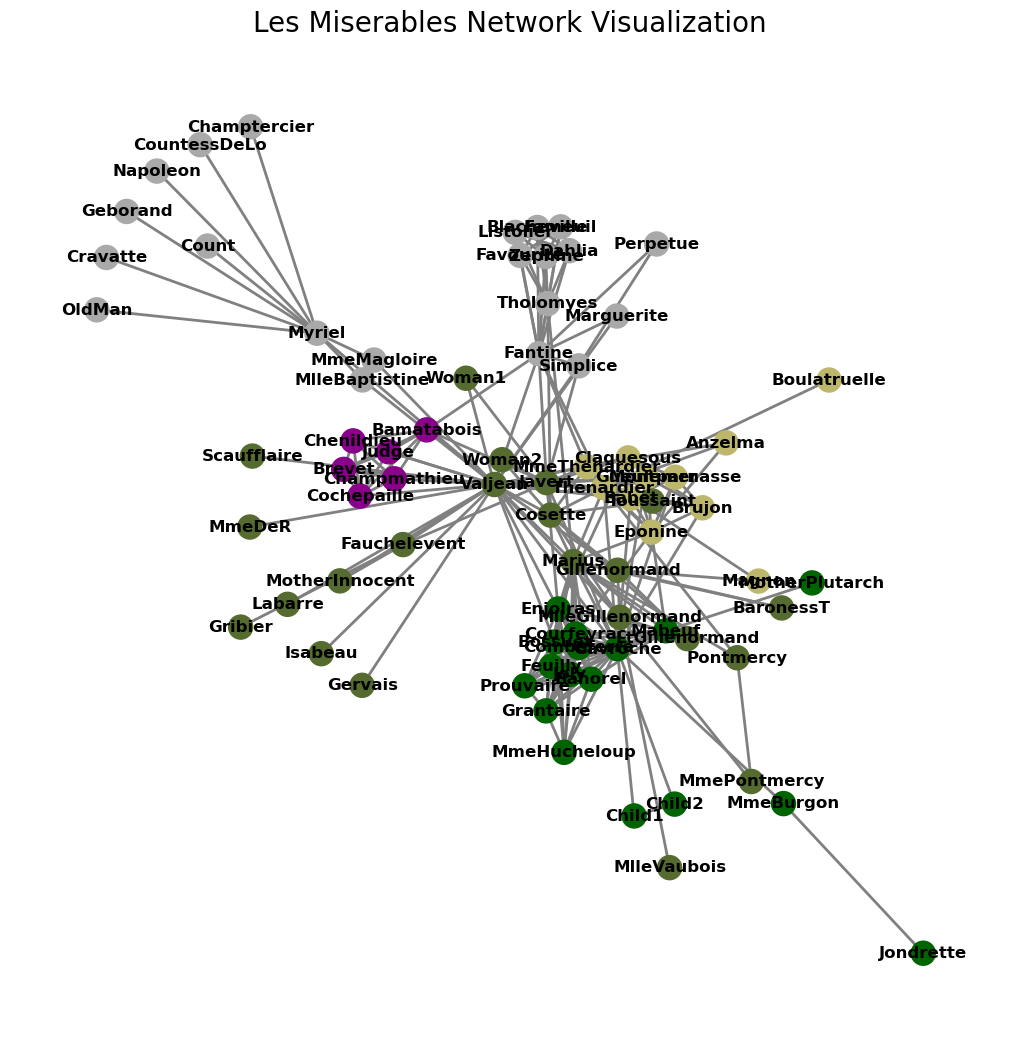

In [29]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 레미제라블 데이터셋 로드
G = nx.les_miserables_graph()

# Louvain 방법을 통해 최적의 partition 생성
partition = community_louvain.best_partition(G)

# 노드별로 색상 지정
colors = [mcolors.CSS4_COLORS[key] for key in mcolors.CSS4_COLORS.keys()][24:40]
node_colors = [colors[community] for community in partition.values()]

# spring layout으로 시각화 
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=300, font_size=12, font_weight='bold', width=2, edge_color='gray')
plt.title('Les Miserables Network Visualization', fontsize=20)
plt.show()